In [2]:
! pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_io_gcs_filesystem-0.28.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-22.11.23-py2.py3-none-any.whl (26 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
path = "C:\\Users\\santh\\Downloads\\clothing-dataset-small-master1/train/t-shirt"
name = '1dfed9b7-d0c3-4c6b-aa8b-e827b3558c0c.jpg'
fullname = f'{path}/{name}'
fullname

'C:\\Users\\santh\\Downloads\\clothing-dataset-small-master1/train/t-shirt/1dfed9b7-d0c3-4c6b-aa8b-e827b3558c0c.jpg'

In [30]:
img = load_img(fullname, target_size=(299,299))

In [31]:
x= np.array(img)
x.shape

(299, 299, 3)

## Pre-Trained Convolutional Neural Networks

In [44]:
# Import the Xception model 
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [26]:
# Create a new Xception model
model = Xception(weights='imagenet',input_shape=(299,299, 3))

91884032/91884032 [==============================] - 154s 2us/step


In [38]:
X = np.array([x])

In [39]:
X = preprocess_input(X)

In [42]:
pred = model.predict(X)

1/1 [==============================] - 0s 115ms/step


In [43]:
pred.shape

(1, 1000)

In [45]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 7us/step


[[('n03595614', 'jersey', 0.6960742),
  ('n02667093', 'abaya', 0.053645898),
  ('n04370456', 'sweatshirt', 0.03788377),
  ('n03980874', 'poncho', 0.018085094),
  ('n04599235', 'wool', 0.008777763)]]

## Transfer Learning

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input) 
train_ds = train_gen.flow_from_directory("C:\\Users\\santh\\Downloads\\clothing-dataset-small-master1/train",
                                        target_size=(150,150),batch_size=32)

Found 3068 images belonging to 10 classes.


In [51]:
X, y = next(train_ds)

In [53]:
X.shape

(32, 150, 150, 3)

In [102]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input) 
val_ds = val_gen.flow_from_directory("C:\\Users\\santh\\Downloads\\clothing-dataset-small-master1/validation",
                                        target_size=(150,150),batch_size=32,shuffle=False)

Found 341 images belonging to 10 classes.


In [67]:
base_model = Xception(
            weights="imagenet",
            include_top = False,
            input_shape =(150,150,3))

base_model.trainable = False

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training = False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [68]:
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [69]:
preds.shape

(32, 10)

In [73]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [74]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [77]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 56s 586ms/step - loss: 0.0200 - accuracy: 0.9977 - val_loss: 0.8333 - val_accuracy: 0.8123
Epoch 2/10
96/96 [==============================] - 56s 586ms/step - loss: 0.0136 - accuracy: 0.9997 - val_loss: 0.8939 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 56s 586ms/step - loss: 0.0202 - accuracy: 0.9980 - val_loss: 0.8779 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 57s 589ms/step - loss: 0.0849 - accuracy: 0.9743 - val_loss: 1.3236 - val_accuracy: 0.7654
Epoch 5/10
96/96 [==============================] - 57s 592ms/step - loss: 0.1962 - accuracy: 0.9381 - val_loss: 1.2599 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 56s 585ms/step - loss: 0.2196 - accuracy: 0.9368 - val_loss: 1.3553 - val_accuracy: 0.7918
Epoch 7/10
96/96 [==============================] - 56s 587ms/step - loss: 0.3030 - accuracy: 0.9188 - val_loss: 1.8561 - val_accuracy: 0.7625

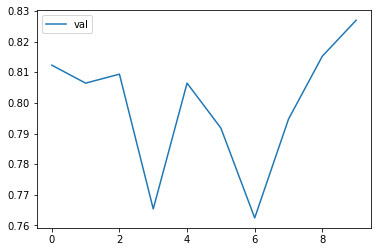

In [81]:
#plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'val')

plt.legend()

## Adjusting the Learning Rate :

In [82]:
def make_model(learning_rate = 0.01):
    base_model = Xception(
            weights="imagenet",
            include_top = False,
            input_shape =(150,150,3))

    base_model.trainable = False

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training = False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [83]:
scores = {}

for lr in [0.0001,0.001,.01,0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 60s 597ms/step - loss: 1.8564 - accuracy: 0.3973 - val_loss: 1.5673 - val_accuracy: 0.4927
Epoch 2/10
96/96 [==============================] - 56s 587ms/step - loss: 1.3640 - accuracy: 0.5662 - val_loss: 1.2309 - val_accuracy: 0.6305
Epoch 3/10
96/96 [==============================] - 57s 591ms/step - loss: 1.1316 - accuracy: 0.6359 - val_loss: 1.0503 - val_accuracy: 0.6862
Epoch 4/10
96/96 [==============================] - 56s 585ms/step - loss: 0.9931 - accuracy: 0.6887 - val_loss: 0.9390 - val_accuracy: 0.7185
Epoch 5/10
96/96 [==============================] - 57s 591ms/step - loss: 0.9007 - accuracy: 0.7158 - val_loss: 0.8675 - val_accuracy: 0.7361
Epoch 6/10
96/96 [==============================] - 57s 589ms/step - loss: 0.8339 - accuracy: 0.7321 - val_loss: 0.8150 - val_accuracy: 0.7507
Epoch 7/10
96/96 [==============================] - 57s 590ms/step - loss: 0.7805 - accuracy: 0.7497 - val_loss: 0.7777 - val_accuracy:

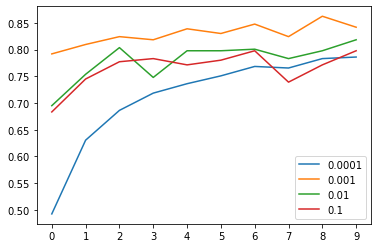

In [86]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label = lr)
    
plt.xticks(np.arange(10))
plt.legend()

In [87]:
learning_rate = 0.001

## Checkpointing

In [88]:
model.save_weights('model_vl.h5',save_format='h5')

In [89]:
checkpoint = keras.callbacks.ModelCheckpoint(
        'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
        save_best_only=True,monitor = 'val_accuracy',
        mode='max')

In [90]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)
  

Epoch 1/10
96/96 [==============================] - 62s 617ms/step - loss: 1.0935 - accuracy: 0.6274 - val_loss: 0.6778 - val_accuracy: 0.7977
Epoch 2/10
96/96 [==============================] - 57s 595ms/step - loss: 0.6233 - accuracy: 0.7855 - val_loss: 0.5869 - val_accuracy: 0.8182
Epoch 3/10
96/96 [==============================] - 57s 591ms/step - loss: 0.5024 - accuracy: 0.8302 - val_loss: 0.5667 - val_accuracy: 0.8211
Epoch 4/10
96/96 [==============================] - 57s 590ms/step - loss: 0.4279 - accuracy: 0.8631 - val_loss: 0.5481 - val_accuracy: 0.8328
Epoch 5/10
96/96 [==============================] - 57s 593ms/step - loss: 0.3700 - accuracy: 0.8862 - val_loss: 0.5424 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 57s 591ms/step - loss: 0.3293 - accuracy: 0.9048 - val_loss: 0.5320 - val_accuracy: 0.8358
Epoch 7/10
96/96 [==============================] - 57s 590ms/step - loss: 0.2855 - accuracy: 0.9208 - val_loss: 0.5340 - val_accuracy: 0.8123

## Adding More Layers 

In [91]:
def make_model(learning_rate = 0.001,size_inner = 100):
    base_model = Xception(
            weights="imagenet",
            include_top = False,
            input_shape =(150,150,3))

    base_model.trainable = False

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training = False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [97]:
learning_rate = 0.001
scores = {}

for size in [10,100,1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 64s 633ms/step - loss: 2.0436 - accuracy: 0.3090 - val_loss: 1.6268 - val_accuracy: 0.5044
Epoch 2/10
96/96 [==============================] - 59s 620ms/step - loss: 1.7490 - accuracy: 0.3787 - val_loss: 1.4382 - val_accuracy: 0.5689
Epoch 3/10
96/96 [==============================] - 60s 622ms/step - loss: 1.6182 - accuracy: 0.4143 - val_loss: 1.3045 - val_accuracy: 0.5982
Epoch 4/10
96/96 [==============================] - 59s 616ms/step - loss: 1.5828 - accuracy: 0.4325 - val_loss: 1.2496 - val_accuracy: 0.6070
Epoch 5/10
96/96 [==============================] - 841s 9s/step - loss: 1.5034 - accuracy: 0.4531 - val_loss: 1.1709 - val_accuracy: 0.6070
Epoch 6/10
96/96 [==============================] - 57s 591ms/step - loss: 1.4720 - accuracy: 0.4443 - val_loss: 1.1534 - val_accuracy: 0.6628
Epoch 7/10
96/96 [==============================] - 56s 588ms/step - loss: 1.4315 - accuracy: 0.4524 - val_loss: 1.0980 - val_accuracy: 0.662

## Regularization and Dropout

In [98]:
 def make_model(learning_rate = 0.001,size_inner = 100, droprate=0.5):
    base_model = Xception(
            weights="imagenet",
            include_top = False,
            input_shape =(150,150,3))

    base_model.trainable = False

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training = False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) 
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [99]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0,0.2,0.5,0.8]:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate, size_inner=size,droprate=droprate)
    
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 63s 625ms/step - loss: 0.9581 - accuracy: 0.6633 - val_loss: 0.6139 - val_accuracy: 0.8065
Epoch 2/30
96/96 [==============================] - 61s 632ms/step - loss: 0.5107 - accuracy: 0.8237 - val_loss: 0.5604 - val_accuracy: 0.8152
Epoch 3/30
96/96 [==============================] - 59s 619ms/step - loss: 0.3750 - accuracy: 0.8713 - val_loss: 0.5472 - val_accuracy: 0.8240
Epoch 4/30
96/96 [==============================] - 58s 606ms/step - loss: 0.2524 - accuracy: 0.9195 - val_loss: 0.5864 - val_accuracy: 0.7977
Epoch 5/30
96/96 [==============================] - 59s 614ms/step - loss: 0.1768 - accuracy: 0.9514 - val_loss: 0.6625 - val_accuracy: 0.8006
Epoch 6/30
96/96 [==============================] - 60s 628ms/step - loss: 0.1332 - accuracy: 0.9668 - val_loss: 0.5721 - val_accuracy: 0.8065
Epoch 7/30
96/96 [==============================] - 65s 672ms/step - loss: 0.0930 - accuracy: 0.9798 - val_loss: 0.5816 - val_accuracy: 0.

Epoch 28/30
96/96 [==============================] - 57s 594ms/step - loss: 0.0182 - accuracy: 0.9964 - val_loss: 0.7356 - val_accuracy: 0.8094
Epoch 29/30
96/96 [==============================] - 57s 593ms/step - loss: 0.0175 - accuracy: 0.9958 - val_loss: 0.7889 - val_accuracy: 0.8065
Epoch 30/30
96/96 [==============================] - 57s 592ms/step - loss: 0.0194 - accuracy: 0.9948 - val_loss: 0.7952 - val_accuracy: 0.7947


0.5
Epoch 1/30
96/96 [==============================] - 60s 597ms/step - loss: 1.2976 - accuracy: 0.5658 - val_loss: 0.7994 - val_accuracy: 0.7419
Epoch 2/30
96/96 [==============================] - 56s 587ms/step - loss: 0.8118 - accuracy: 0.7207 - val_loss: 0.6638 - val_accuracy: 0.7801
Epoch 3/30
96/96 [==============================] - 56s 588ms/step - loss: 0.7084 - accuracy: 0.7549 - val_loss: 0.5916 - val_accuracy: 0.8152
Epoch 4/30
96/96 [==============================] - 56s 587ms/step - loss: 0.6034 - accuracy: 0.7878 - val_loss: 0.5691 - val_accurac

Epoch 25/30
96/96 [==============================] - 57s 598ms/step - loss: 0.6974 - accuracy: 0.7321 - val_loss: 0.5573 - val_accuracy: 0.8270
Epoch 26/30
96/96 [==============================] - 57s 595ms/step - loss: 0.6764 - accuracy: 0.7392 - val_loss: 0.6076 - val_accuracy: 0.8152
Epoch 27/30
96/96 [==============================] - 57s 593ms/step - loss: 0.6680 - accuracy: 0.7376 - val_loss: 0.5838 - val_accuracy: 0.8123
Epoch 28/30
96/96 [==============================] - 57s 596ms/step - loss: 0.6510 - accuracy: 0.7415 - val_loss: 0.5648 - val_accuracy: 0.8270
Epoch 29/30
96/96 [==============================] - 57s 595ms/step - loss: 0.6465 - accuracy: 0.7432 - val_loss: 0.5822 - val_accuracy: 0.8123
Epoch 30/30
96/96 [==============================] - 57s 596ms/step - loss: 0.6389 - accuracy: 0.7425 - val_loss: 0.5512 - val_accuracy: 0.8270




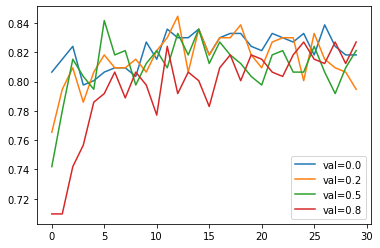

In [100]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label = (f'val={droprate}'))

plt.legend()

## Data Augumentation

In [103]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                              shear_range=10.0,
                              zoom_range=0.1,
                              vertical_flip=True) 

train_ds = train_gen.flow_from_directory("C:\\Users\\santh\\Downloads\\clothing-dataset-small-master1/train",
                                        target_size=(150,150),
                                         batch_size=32)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input) 
val_ds = val_gen.flow_from_directory("C:\\Users\\santh\\Downloads\\clothing-dataset-small-master1/validation",
                                        target_size=(150,150),
                                        batch_size=32,
                                        shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [104]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(learning_rate=learning_rate,
                   size_inner=size,
                   droprate=droprate)
    
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 70s 688ms/step - loss: 1.3408 - accuracy: 0.5518 - val_loss: 0.8203 - val_accuracy: 0.7419
Epoch 2/50
96/96 [==============================] - 65s 672ms/step - loss: 0.9280 - accuracy: 0.6819 - val_loss: 0.7261 - val_accuracy: 0.7654
Epoch 3/50
96/96 [==============================] - 59s 614ms/step - loss: 0.8062 - accuracy: 0.7246 - val_loss: 0.6343 - val_accuracy: 0.8094
Epoch 4/50
96/96 [==============================] - 62s 645ms/step - loss: 0.6965 - accuracy: 0.7617 - val_loss: 0.6577 - val_accuracy: 0.7830
Epoch 5/50
96/96 [==============================] - 64s 661ms/step - loss: 0.6753 - accuracy: 0.7689 - val_loss: 0.6485 - val_accuracy: 0.7830
Epoch 6/50
96/96 [==============================] - 64s 664ms/step - loss: 0.6117 - accuracy: 0.7878 - val_loss: 0.6172 - val_accuracy: 0.8065
Epoch 7/50
96/96 [==============================] - 64s 671ms/step - loss: 0.5657 - accuracy: 0.8087 - val_loss: 0.6307 - val_accuracy: 0.7742

<function matplotlib.pyplot.legend(*args, **kwargs)>

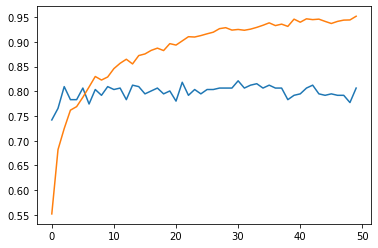

In [105]:
hist = history.history
plt.plot(hist['val_accuracy'],label='val')
plt.plot(hist['accuracy'],label='train')

plt.legend

## Training a Larger Model

In [110]:
 def make_model(input_size=150,learning_rate = 0.001,size_inner = 100, droprate=0.5):
    base_model = Xception(
            weights="imagenet",
            include_top = False,
            input_shape =(input_size,input_size,3))

    base_model.trainable = False

    inputs = keras.Input(shape=(input_size,input_size,3))
    base = base_model(inputs, training = False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) 
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [111]:
input_size = 299

In [112]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,shear_range=10,zoom_range=0.1,horizontal_flip=True) 

train_ds = train_gen.flow_from_directory("C:\\Users\\santh\\Downloads\\clothing-dataset-small-master1/train",
                                        target_size=(input_size,input_size),
                                         batch_size=32)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input) 
val_ds = val_gen.flow_from_directory("C:\\Users\\santh\\Downloads\\clothing-dataset-small-master1/validation",
                                        target_size=(input_size,input_size),
                                        batch_size=32,
                                        shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [113]:
checkpoint = keras.callbacks.ModelCheckpoint(
        'xception_v6_{epoch:02d}_{val_accuracy:.3f}.h5',
        save_best_only=True,monitor = 'val_accuracy',
        mode='max')

In [115]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(learning_rate=learning_rate,
                   input_size=299,
                   size_inner=size,
                   droprate=droprate)
    
history = model.fit(train_ds, epochs=15, validation_data=val_ds,callbacks=[checkpoint])

Epoch 1/15
96/96 [==============================] - 264s 3s/step - loss: 0.9788 - accuracy: 0.6923 - val_loss: 0.5352 - val_accuracy: 0.8299
Epoch 2/15
96/96 [==============================] - 257s 3s/step - loss: 0.5198 - accuracy: 0.8250 - val_loss: 0.4330 - val_accuracy: 0.8622
Epoch 3/15
96/96 [==============================] - 259s 3s/step - loss: 0.4338 - accuracy: 0.8514 - val_loss: 0.3894 - val_accuracy: 0.8739
Epoch 4/15
96/96 [==============================] - 257s 3s/step - loss: 0.3741 - accuracy: 0.8703 - val_loss: 0.3646 - val_accuracy: 0.8651
Epoch 5/15
96/96 [==============================] - 256s 3s/step - loss: 0.3404 - accuracy: 0.8801 - val_loss: 0.3787 - val_accuracy: 0.8739
Epoch 6/15
96/96 [==============================] - 257s 3s/step - loss: 0.3131 - accuracy: 0.8911 - val_loss: 0.3577 - val_accuracy: 0.8856
Epoch 7/15
96/96 [==============================] - 257s 3s/step - loss: 0.2900 - accuracy: 0.9045 - val_loss: 0.3573 - val_accuracy: 0.8739
Epoch 8/15
96

## Using the Model

In [116]:
model = keras.models.load_model('xception_v6_08_0.891.h5')

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

In [118]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input) 

test_ds = val_gen.flow_from_directory("C:\\Users\\santh\\Downloads\\clothing-dataset-small-master1/test",
                                        target_size=(299,299),batch_size=32,shuffle=False)

Found 372 images belonging to 10 classes.


In [119]:
model.evaluate(test_ds)

12/12 [==============================] - 30s 2s/step - loss: 0.2749 - accuracy: 0.8925


[0.2748715281486511, 0.8924731016159058]

In [151]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [162]:
path1 = "C:\\Users\\santh\\Downloads\\clothing-dataset-small-master1/test/t-shirt/2cc6e505-1a89-42e0-8177-017118117027.jpg"

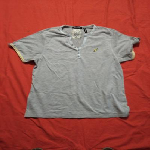

In [163]:
load_img(path1, target_size=(150,150))

In [164]:
x1 = np.array(img)
X1 = np.array([x1])
X1.shape

(1, 299, 299, 3)

In [165]:
X1 = preprocess_input(X1)

In [166]:
pred1 = model.predict(X1)

1/1 [==============================] - 0s 104ms/step


In [167]:
classes = [
        'dress',
        'hat',
        'longsleeve',
        'outwear',
        'pants',
        'shirt',
        'shoes',
        'shorts',
        'skirt',
        't-shirt'
]

In [168]:
dict(zip(classes,pred1[0]))

{'dress': 1.8179438,
 'hat': -2.065715,
 'longsleeve': 3.3919392,
 'outwear': -2.190077,
 'pants': -4.3776217,
 'shirt': 0.231689,
 'shoes': -3.9589014,
 'shorts': -2.5379896,
 'skirt': -1.8926289,
 't-shirt': 5.65667}